<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.502972,89.932444,58.974164,78.389057,0.012281,268.810917,268.823772,-0.012855
1,0.0,1.0,59.440742,25.141246,66.743541,34.633883,-0.373703,195.585708,195.968073,-0.382365
2,0.0,2.0,83.283780,36.704222,95.624732,96.126133,0.179262,321.918129,321.743906,0.174223
3,0.0,3.0,79.937343,44.312718,26.818380,49.037753,-0.019131,210.087064,210.126152,-0.039088
4,0.0,4.0,86.367304,33.286109,66.324688,92.753442,0.159499,288.891041,288.751032,0.140009
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.704201,59.525247,99.435811,40.245425,0.003909,281.914594,281.915679,-0.001085
119996,999.0,116.0,23.097923,69.691691,43.451136,91.514116,0.027699,237.782566,237.759293,0.023272
119997,999.0,117.0,98.934738,51.565250,81.511524,24.322347,-0.078875,266.254985,266.336003,-0.081018
119998,999.0,118.0,67.798492,78.242205,78.964810,81.632569,-0.032971,316.605106,316.647158,-0.042053


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.502972  89.932444  58.974164  78.389057  0.012281  268.810917   
      1.0    59.440742  25.141246  66.743541  34.633883 -0.373703  195.585708   
      2.0    83.283780  36.704222  95.624732  96.126133  0.179262  321.918129   
      3.0    79.937343  44.312718  26.818380  49.037753 -0.019131  210.087064   
      4.0    86.367304  33.286109  66.324688  92.753442  0.159499  288.891041   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.704201  59.525247  99.435811  40.245425  0.003909  281.914594   
      116.0  23.097923  69.691691  43.451136  91.514116  0.027699  237.782566   
      117.0  98.934738  51.565250  81.511524  24.322347 -0.078875  266.254985   
      118.0  67.798492  78.242205  78.964810  81.632569 -0.032971  316.605106   
      119.0  65.803013  91.765217  33.695543  78.499878 -0.029589  279.734063   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    268.823772 -0.012855  
      1.0    195.968073 -0.382365  
      2.0    321.743906  0.174223  
      3.0    210.126152 -0.039088  
      4.0    288.751032  0.140009  
...                 ...       ...  
999.0 115.0  281.915679 -0.001085  
      116.0  237.759293  0.023272  
      117.0  266.336003 -0.081018  
      118.0  316.647158 -0.042053  
      119.0  279.764309 -0.030246  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.502972  89.932444  58.974164  78.389057  0.012281  268.810917   
      1.0    59.440742  25.141246  66.743541  34.633883 -0.373703  195.585708   
      2.0    83.283780  36.704222  95.624732  96.126133  0.179262  321.918129   
      3.0    79.937343  44.312718  26.818380  49.037753 -0.019131  210.087064   
      4.0    86.367304  33.286109  66.324688  92.753442  0.159499  288.891041   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.704201  59.525247  99.435811  40.245425  0.003909  281.914594   
      116.0  23.097923  69.691691  43.451136  91.514116  0.027699  237.782566   
      117.0  98.934738  51.565250  81.511524  24.322347 -0.078875  266.254985   
      118.0  67.798492  78.242205  78.964810  81.632569 -0.032971  316.605106   
      119.0  65.803013  91.765217  33.695543  78.499878 -0.029589  279.734063   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    268.823772 -0.012855  
      1.0    195.968073 -0.382365  
      2.0    321.743906  0.174223  
      3.0    210.126152 -0.039088  
      4.0    288.751032  0.140009  
...                 ...       ...  
999.0 115.0  281.915679 -0.001085  
      116.0  237.759293  0.023272  
      117.0  266.336003 -0.081018  
      118.0  316.647158 -0.042053  
      119.0  279.764309 -0.030246  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.502972,89.932444,58.974164,78.389057,0.012281,268.810917,268.823772,-0.012855
1,0.0,1.0,59.440742,25.141246,66.743541,34.633883,-0.373703,195.585708,195.968073,-0.382365
2,0.0,2.0,83.283780,36.704222,95.624732,96.126133,0.179262,321.918129,321.743906,0.174223
3,0.0,3.0,79.937343,44.312718,26.818380,49.037753,-0.019131,210.087064,210.126152,-0.039088
4,0.0,4.0,86.367304,33.286109,66.324688,92.753442,0.159499,288.891041,288.751032,0.140009
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.704201,59.525247,99.435811,40.245425,0.003909,281.914594,281.915679,-0.001085
119996,999.0,116.0,23.097923,69.691691,43.451136,91.514116,0.027699,237.782566,237.759293,0.023272
119997,999.0,117.0,98.934738,51.565250,81.511524,24.322347,-0.078875,266.254985,266.336003,-0.081018
119998,999.0,118.0,67.798492,78.242205,78.964810,81.632569,-0.032971,316.605106,316.647158,-0.042053


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.502972  89.932444  58.974164  78.389057  0.012281  268.810917   
      1.0    59.440742  25.141246  66.743541  34.633883 -0.373703  195.585708   
      2.0    83.283780  36.704222  95.624732  96.126133  0.179262  321.918129   
      3.0    79.937343  44.312718  26.818380  49.037753 -0.019131  210.087064   
      4.0    86.367304  33.286109  66.324688  92.753442  0.159499  288.891041   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.704201  59.525247  99.435811  40.245425  0.003909  281.914594   
      116.0  23.097923  69.691691  43.451136  91.514116  0.027699  237.782566   
      117.0  98.934738  51.565250  81.511524  24.322347 -0.078875  266.254985   
      118.0  67.798492  78.242205  78.964810  81.632569 -0.032971  316.605106   
      119.0  65.803013  91.765217  33.695543  78.499878 -0.029589  279.734063   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    268.823772 -0.012855  
      1.0    195.968073 -0.382365  
      2.0    321.743906  0.174223  
      3.0    210.126152 -0.039088  
      4.0    288.751032  0.140009  
...                 ...       ...  
999.0 115.0  281.915679 -0.001085  
      116.0  237.759293  0.023272  
      117.0  266.336003 -0.081018  
      118.0  316.647158 -0.042053  
      119.0  279.764309 -0.030246  

[120000 rows x 8 columns]

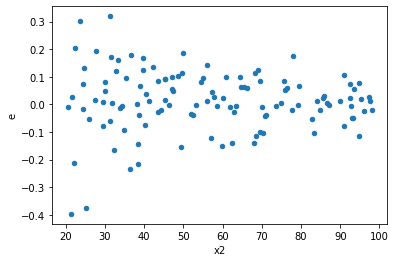

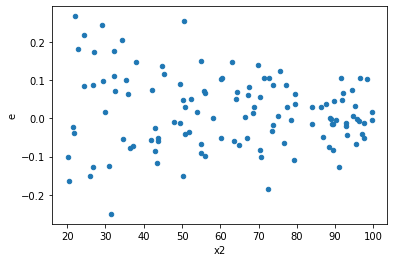

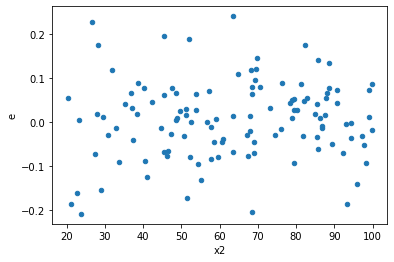

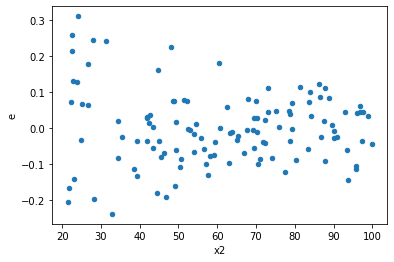

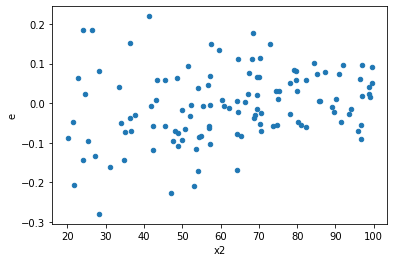

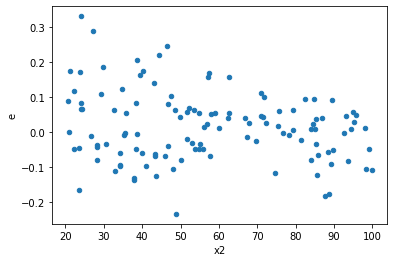

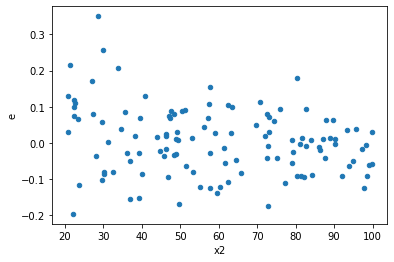

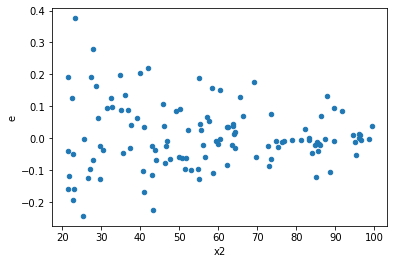

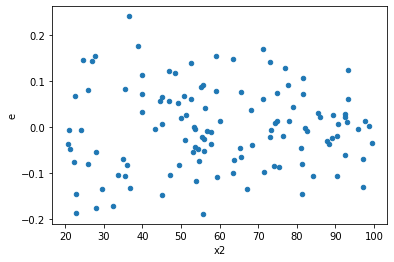

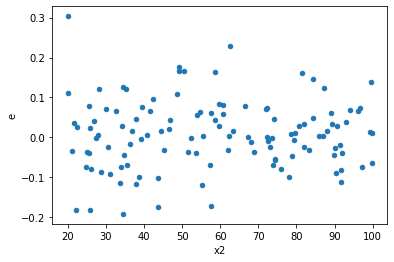

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,58.0,54.0,0.6599226809033869,0.6904493206357784,0.011377977256954946,0.012786098530292191,1.1237584890123165,0.6666615003987055,0.6666692498006472,0.33333075019935277,Reject001=1 : Homoscedasticity
2.0,47.0,65.0,0.32178846944890455,0.5346632954994879,0.006846563179763927,0.008225589161530582,1.201418718495519,0.4889177079216991,0.7555411460391505,0.24445885396084954,Reject001=1 : Homoscedasticity
5.0,55.0,57.0,0.4602665980559833,0.5499737878946357,0.008368483601017879,0.009648662945519925,1.1529762625508801,0.5948978135286938,0.7025510932356531,0.2974489067643469,Reject001=1 : Homoscedasticity
6.0,63.0,49.0,0.4745284054183273,0.45258966619398616,0.00753219691140202,0.009236523799877269,1.226272216263397,0.4600464370294097,0.7699767814852951,0.23002321851470486,Reject001=1 : Homoscedasticity
7.0,58.0,54.0,0.32780481370883213,0.823230987405313,0.0056518071329108984,0.015245018285283574,2.697370580200921,0.00031929788791296154,0.9998403510560435,0.00015964894395648077,Reject001=0 : Heteroscedasticity
8.0,65.0,47.0,0.48720110480672546,0.4040561811011462,0.007495401612411161,0.008596940023428644,1.146961893168408,0.6258912148974651,0.6870543925512674,0.31294560744873257,Reject001=1 : Homoscedasticity
9.0,55.0,57.0,0.3370817245560404,0.5107687248371224,0.006128758628291644,0.008960854821703902,1.4620994829750193,0.15742781575640974,0.9212860921217951,0.07871390787820487,Reject001=1 : Homoscedasticity
10.0,54.0,58.0,0.35459791580927535,0.4785654620990546,0.006566628070542136,0.008251128656880252,1.256524439673198,0.39339202994246847,0.8033039850287658,0.19669601497123423,Reject001=1 : Homoscedasticity
11.0,43.0,69.0,0.36129465456088977,0.7246774260315191,0.008402201268857901,0.010502571391761147,1.249978553916353,0.4032225109451111,0.7983887445274445,0.20161125547255554,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,54.0,0.6599226809033869,0.6904493206357784,0.011377977256954946,0.012786098530292191,1.1237584890123165,0.6666615003987055,Reject001=1 : Homoscedasticity
1.0,45.0,67.0,0.5949903915852826,0.4291866511676667,0.013222008701895167,0.006405770912950249,0.48447789268449676,0.010995055603972697,Reject001=1 : Homoscedasticity
2.0,47.0,65.0,0.32178846944890455,0.5346632954994879,0.006846563179763927,0.008225589161530582,1.201418718495519,0.4889177079216991,Reject001=1 : Homoscedasticity
3.0,66.0,46.0,0.6905079415735779,0.2701401640086067,0.010462241538993604,0.005872612261056667,0.5613149189080539,0.03118762192631523,Reject001=1 : Homoscedasticity
4.0,64.0,48.0,0.5271933758905788,0.27860772279956825,0.008237396498290294,0.005804327558324339,0.7046313188310228,0.18984241450227368,Reject001=1 : Homoscedasticity
5.0,55.0,57.0,0.4602665980559833,0.5499737878946357,0.008368483601017879,0.009648662945519925,1.1529762625508801,0.5948978135286938,Reject001=1 : Homoscedasticity
6.0,63.0,49.0,0.4745284054183273,0.45258966619398616,0.00753219691140202,0.009236523799877269,1.226272216263397,0.4600464370294097,Reject001=1 : Homoscedasticity
7.0,58.0,54.0,0.32780481370883213,0.823230987405313,0.0056518071329108984,0.015245018285283574,2.697370580200921,0.00031929788791296154,Reject001=0 : Heteroscedasticity
8.0,65.0,47.0,0.48720110480672546,0.4040561811011462,0.007495401612411161,0.008596940023428644,1.146961893168408,0.6258912148974651,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      814
Reject001=0 : Heteroscedasticity    186
Name: Result_test, dtype: int64